
<img src="https://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" style="float:right" height="100px">
<img src="https://www.inf.utfsm.cl/images/sitio/di.png" style="float:left;"height="100px">
<center>
    <h1> INF-395/477 Redes Neuronales Artificiales - I-2020</h1>
    <h1> Taller 2 - Redes Neuronales y *Deep Learning*</h1>
    <h3> Parte 1: Propuesta </h3>
</center>

## Integrantes: 
* Gabriel Arjona  - 201473529-4
* Roberto Fuentes - 201173037-2 
* German Treimun  - 20l173085-2

## Grupo:
* Los Gatos con Corbatin

<a id="primero"></a>
## 1. Pregunta Libre

Refute o evidencie experimentalmente una de las siguientes afirmaciones 

> Tema 4. Regularizar un autoencoder para obtener representaciones *sparse* (dispersas) permite mejorar la calidad de las representaciones obtenidas para datos que no están en el conjunto de entrenamiento. 

Evidenciamos la afirmación de forma experimental.



## Introduccion

Primero, debemos tener presente que al referirnos a la calidad de las representaciones obtenidas, nos referimos al _output_ que nos entrega el encoder que usemos. La idea de regularizar nuestro _autoencoder_ es poner restricciones sobre el espacio, limitando la libertad de aprendizaje. Al ser dispersa, nos referimos a que nuestra representación tendrá muchos ceros, por lo que aprenderá de una forma más dinámica, es decir, usara las pocas neuronas activas para poder aprender. Matemáticamente queremos minimizar lo siguiente:

$$
\underset{E,D}{\text{$$arg min }} L = L_R(\hat{x}, x) + \lambda \Omega (z)
$$

Es decir, minimizar una _loss_ relacionada al _Encoder_ ($E$) y al _Decoder_ ($D$), la cual esta asociada a una función de reconstrucción $L_R$ y a una penalización que se aplica sobre el _embedding_ ($z$), a través de un peso $\lambda$ que nos indica la importancia de esta penalización. Como opciones para la penalización :
* $\Omega(z) = \Vert z \Vert_0 \rightarrow \text{Componentes no nulas}$
* $\Omega(z) = \Vert z \Vert_1 \rightarrow \text{Norma l1}$ 
* $\Omega(z) = \Vert z \Vert_2 \rightarrow \text{Norma l2}$
* $\Omega(z) = KL(\rho \Vert \overline{z}) \rightarrow \text{Distancia entre promedio del embedding z y un $\rho$ cercano a $0$ }$

La idea de estas funciones $\Omega$ es forzar a que hayan componentes nulas, de tal forma que las componentes no nulas sean realmente representativas, para poder asi aprender correctamente los patrones de los datos, forzando la dispersidad.

Por lo tanto, al usar una representación _sparse_ se limita la capacidad del vector de representación, forzando a que las caracteristicas se usen de forma mas inteligente, buscando acotar y que las características sean más representativas de propiedades reales de la imagen.

Generalmente se usan las normas l1 y l2 (lasso y quadratic) para representaciones _sparse_ en autoencoders:

$$
\Vert z \Vert_1 = \sum_{j=1}^n |z_i|
$$

$$
\Vert z \Vert_2 = \left( \sum_{j=1}^n z_i^2 \right)^{\frac{1}{2}}
$$

Aunque l1 y l2 pueden usarse como términos de regularización, la diferencia entre ellos es que l1 tiende a **reducir el coeficiente de penalización a cero**, mientras que l2 **movería los coeficientes hacia cero, pero nunca alcanzarán dicho valor**. Por lo tanto, la regularización de l1 se usa a menudo como un método de extracción de características.  Esto ocurre por las derivadas de ambas funciones (ya que generalmente usamos gradiente descendente para la convergencia):
![texto alternativo](https://cutt.ly/EpHT6Aj)

Se puede observar que para l1, el gradiente es $1$ o $-1$, excepto cuando $z = 0$, lo que significa que la regularización de l1 siempre moverá $z$ hacia cero con el mismo tamaño de paso ($1$ o $-1$) independientemente del valor de $z$. Y cuando $z = 0$, el gradiente se convierte en cero y ya no se realizará ninguna actualización. Sin embargo, para la regularización de l2, también moverá $z$ hacia cero, pero el tamaño del paso se vuelve cada vez más pequeño en cada iteracion, lo que significa que $z$ nunca llegará a cero.




## Métricas

Para poder medir cuantitativamente la diferencia entre la imagen real y las imagenes que nos entrega el _decoder_ luego de regularizar, usamos dos métricas:

* _Mean Square Error_ (MSE): La fórmula del error cuadrático medio es la siguiente:

$$
MSE = \frac{1}{H\cdot W} \sum_{i=0}^{H-1} \sum_{j=0}^{W-1} \left[ A(i,j) - B(i,j)\right]^2
$$

La idea es comparar el _pixel_ $(i,j)$ de la imagen $A$ con la imagen $B$, ambos con altura H (_Height_) y ancho W (_width_) utilizando el MSE como fórmula. Para el caso de las imágenes con 3 canales (RGB) la fórmula cambia levemente:

$$
MSE^{*} = \sum_{i=0}^{H-1} \sum_{j=0}^{W-1} \left[ A(i,j) - B(i,j)\right]^2 \\
MSE = \frac{1}{3\cdot H\cdot W} \left[MSE^{*}(A_R, B_R) + MSE^{*}(A_G, B_G) + MSE^{*}(A_B, B_B)\right]
$$

Es decir, aplicamos la misma lógica del MSE para cada canal, pero sin multiplicar por el factor que contiene la multiplicación entre el largo y el ancho, ya que esto se hace luego de la suma de los 3 canales (y múltiplicando este factor por $\frac{1}{3}$)

MSE es muy simple de implementar, pero cuando lo usamos para comparar imágenes, al tener grandes distancias entre las intensidades de píxeles, esto no significan necesariamente que el contenido de las imágenes sea diferente. 

Es importante tener en cuenta que un valor de $0$ para MSE indica que ambas imagenes son iguales, y un valor mayor a 0 denota que las imagenes son distintas. Entre más se aleje MSE de 0 más distintas son las imágenes.

* _Structural Similarity Index Meassure_ (SSIM): La fórmula de SSIM es:

$$
SSIM(A,B) = \frac{(2\mu_A \mu_B + c_1) (2\sigma_{xy} + c_2)}{(\mu_A^2 + \mu_B^2 + c_1) (\sigma_A^2 + \sigma_B^2 + c_2)}
$$
El índice de similitud estructural introducido por Weng et al [4], intenta modelar el cambio percibido en la información estructural de la imagen, mientras que MSE realmente está estimando los errores percibidos. SSIM se usa para comparar dos ventanas (pequeñas submuestras) en lugar de la imagen completa (como en MSE). Esto nos da un enfoque más robusto que puede dar cuenta de los cambios en la estructura de la imagen, en lugar de solo el cambio percibido.

A diferencia de MSE, el valor de SSIM puede variar entre $-1$ y $1$, donde $1$ indica que ambas imagenes son iguales. Por lo tanto, entre más lejos de 1 se encuentre el valor, mas diferentes son.


## Referecias

* 1) MNIST dataset: https://keras.io/api/datasets/mnist/
* 2) Architectural Heritage Elements image Dataset: https://old.datahub.io/dataset/architectural-heritage-elements-image-dataset?fbclid=IwAR3MDc5nW54d6pAeXkrqf7NSGO1ae9KWpHIiOB81oed4sN1-YARl5CuZVjo
* 3) LFW Face Dataset: http://vis-www.cs.umass.edu/lfw/#download
* 4) Wang, Zhou and Bovik, Alan and Sheikh, Hamid and Simoncelli, Eero. _Image Quality Assessment: From Error Visibility to Structural Similarity_ , 2004.

## 1) Data Sintetica

La data sintetica usada para el experimento es la data de MNIST (1), correspondiente a un set de imagenes que reflejan diversos numeros.

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPool2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers
from keras_preprocessing.image import ImageDataGenerator
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from decimal import Decimal

from PIL import Image
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
from skimage.metrics import structural_similarity as ssim
from astropy.table import QTable, Table, Column

Using TensorFlow backend.


In [ ]:
rho = 0.2
lamb = 1e-8
def KL_regularizer(a):
  #lamb = 1e-4
  a_mean = K.mean(a, axis =0) #mean over dataset
  return lamb * K.sum( rho*K.log(rho/a_mean) + (1-rho)*K.log( (1-rho)/(1-a_mean)) )

def autoencoder_model(x_train, x_test, encoding_dim, s, ep=30, regu=0):
  input_img = Input(shape = (s,))
  if regu==0:
    # Sin regularizar
    encoded = Dense(encoding_dim, activation='relu')(input_img)
  elif regu == 1:
    #Regularizado con norma l1
    encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(lamb))(input_img)
  elif regu == 2:
    #Regularizado con norma l2
    encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l2(lamb))(input_img)
  elif regu == 3:
    #Regularizado con norma KL
    encoded = Dense(encoding_dim, activation='relu', activity_regularizer=KL_regularizer )(input_img)
    
  decoded = Dense(s, activation='sigmoid')(encoded)

  autoencoder = Model(input_img, decoded)
  
  ###### ENCONDER MODEL ######
  encoder = Model(input_img, encoded)

  ###### DECODER MODEL ######
  encoded_input = Input(shape=(encoding_dim,))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))

  autoencoder.compile(optimizer='adam', loss='mse')

  history = autoencoder.fit(x_train, x_train,
                  epochs=ep,
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test))
  
  return encoded, decoded, autoencoder, encoder, decoder, history

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#Normalizamos todos los valores entre 0 y 1, y hacemos un flatter de las imagenes.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


## Entrenamiento

In [ ]:
#epochs
ep = 50
#shape
s = 784
#encoding dimension
#factor de compresion -> 24.5 (784 / 32)
encoding_dim = 32
encoded, decoded, autoencoder, encoder, decoder, history = autoencoder_model(x_train, x_test, encoding_dim, s, ep, regu=0)
encoded_1, decoded_1, autoencoder_1, encoder_1, decoder_1, history_1 = autoencoder_model(x_train, x_test, encoding_dim, s, ep, regu=1)
encoded_2, decoded_2, autoencoder_2, encoder_2, decoder_2, history_2 = autoencoder_model(x_train, x_test, encoding_dim, s, ep, regu=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.0708 - val_loss: 0.0406
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0343 - val_loss: 0.0290
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0263 - val_loss: 0.0231
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.0215 - val_loss: 0.0192
Epoch 5/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.0182 - val_loss: 0.0164
Epoch 6/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0157 - val_loss: 0.0144
Epoch 7/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.0140 - val_loss: 0.0130
Epoch 8/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0128 - val_loss: 0.0120
Epoch 9/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.0120 - val_loss: 0.0114
Epoch

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

encoded_imgs_1 = encoder_1.predict(x_test)
decoded_imgs_1 = decoder_1.predict(encoded_imgs_1)

encoded_imgs_2 = encoder_2.predict(x_test)
decoded_imgs_2 = decoder_2.predict(encoded_imgs_2)

In [ ]:
hists = [encoded_imgs, encoded_imgs_1, encoded_imgs_2]
images = [x_test, decoded_imgs, decoded_imgs_1, decoded_imgs_2]
historials = [history, history_1, history_2]

images_reshape = []
for i in range(len(images)):
  images_aux = [] 
  for j in range(images[0].shape[0]):
    images_aux.append(images[i][j].reshape(28,28))
  images_aux = np.array(images_aux)
  images_reshape.append(images_aux)

## Funciones para mostrar resultados

In [ ]:
def histograms(en):
  titles = ['Sin regularización', 'regularizado con norma l1', 'regularizado con norma l2']
  plt.figure(figsize=(20, 5))
  n = len(en)
  for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.hist(en[i].flatten(), 50,
            density = True,
            histtype='bar',
            facecolor='b',
            alpha=0.7)
    plt.title(titles[i], fontsize = 18)

In [ ]:
def plot_images(images):
  n = 5
  m = len(images)  
  fig, big_axes = plt.subplots( figsize=(18, 10) , nrows=m, ncols=1)
  titles = ['Test','Sin regularización', 'regularizado con norma l1', 'regularizado con norma l2', 'norma KL']
  for row, big_ax in enumerate(big_axes, start=1):
      big_ax.get_xaxis().set_visible(False)
      big_ax.get_yaxis().set_visible(False)
      big_ax._frameon = False
      big_ax.set_title(titles[row-1], fontsize=16)

  for i in range(n):
      # original
      ax = fig.add_subplot(m, n, i + 1)
      ax.imshow(images[0][i])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # reconstruccion sin regularizacion
      ax = fig.add_subplot(m, n, i + 1 + n)
      ax.imshow(images[1][i])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # reconstruccion con norma l1
      ax = fig.add_subplot(m, n, i + 1 + 2*n)
      ax.imshow(images[2][i])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # reconstruccion con norma l2
      ax = fig.add_subplot(m, n, i + 1 + 3*n)
      ax.imshow(images[3][i])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  fig.set_facecolor('w')
  plt.tight_layout()
  plt.show()

In [ ]:
def losses(historials):
  plt.figure(figsize=(17, 8))
  plt.plot(historials[0].history["loss"], 'k', label = 'Sin regu')
  plt.plot(historials[1].history["loss"], 'r', label = 'l1')
  plt.plot(historials[2].history["loss"], 'b', label = 'l2')
  plt.title('Gráfico de losses', fontsize = 18)
  plt.legend(loc='best', fontsize = 13)
  plt.grid()
  plt.show()

In [ ]:
##for 1 channel
def mse_1(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	return err

##for multichannel (3)
def mse_2(imageA, imageB):
  channels = 0
  for i in range(imageA.shape[2]): 
    err = np.sum((imageA[:,:,i].astype("float") - imageB[:,:,i].astype("float")) ** 2)
    channels += err
  channels /= 3 * float(imageA[:,:,i].shape[0] * imageA[:,:,i].shape[1])
  return channels
#ssim(test_image[0,:,:,:], test_image[0,:,:,:], multichannel=True)

In [ ]:
def show_statistics(historials, hists, images): 
  arr_1 = {
      'menor MSE sin regu': [min(historials[0].history["loss"])],
      'menor MSE norma l1': [min(historials[1].history["loss"])],
      'menor MSE norma l2': [min(historials[2].history["loss"])]
  }

  arr_2 = {
      'Nodos inactivos sin regu': ['{:.2e}'.format(np.count_nonzero(hists[0]<=1e-4))],
      'Nodos inactivos norma l1': ['{:.2e}'.format(np.count_nonzero(hists[1]<=1e-4))],
      'Nodos inactivos norma l2': ['{:.2e}'.format(np.count_nonzero(hists[2]<=1e-4))]
  }

  arr_3 = {
      'Nodos activos sin regu': ['{:.2e}'.format(np.count_nonzero(hists[0]>1e-4))],
      'Nodos activos norma l1': ['{:.2e}'.format(np.count_nonzero(hists[1]>1e-4))],
      'Nodos activos norma l2': ['{:.2e}'.format(np.count_nonzero(hists[2]>1e-4))]
  }
  t_1 = QTable(arr_1) 
  t_2 = QTable(arr_2) 
  t_3 = QTable(arr_3) 
  t_1['menor MSE sin regu'].info.format = '7.6f'
  t_1['menor MSE norma l1'].info.format = '7.6f'
  t_1['menor MSE norma l2'].info.format = '7.6f'

  print('###########################################################################')
  print('#######################       Menor MSE        ############################')
  print('###########################################################################')
  print('###########################################################################')
  print(t_1)
  print('###########################################################################')
  print('########################     Nodos activos     ############################')
  print('###########################################################################')
  print(t_2)
  print('###########################################################################')
  print('########################    Nodos inactivos    ############################')
  print('###########################################################################')
  print(t_3)


  MSE_sin = []
  MSE_l1 = []
  MSE_l2 = []
  SSIM_sin = []
  SSIM_l1 = []
  SSIM_l2 = []
  for i in range(len(images[0])):
    MSE_sin.append(mse_2(images[0][i,:,:,:], images[1][i,:,:,:]))
    MSE_l1.append(mse_2(images[0][i,:,:,:], images[2][i,:,:,:]))
    MSE_l2.append(mse_2(images[0][i,:,:,:], images[3][i,:,:,:]))
    SSIM_sin.append(ssim(images[0][i,:,:,:], images[1][i,:,:,:], multichannel=True))
    SSIM_l1.append(ssim(images[0][i,:,:,:], images[2][i,:,:,:], multichannel=True))
    SSIM_l2.append(ssim(images[0][i,:,:,:], images[3][i,:,:,:], multichannel=True))

  arr = {
      'MSE sin regu': MSE_sin,
      'MSE norma l1': MSE_l1,
      'MSE norma l2': MSE_l2,
      'SSIM sin relu': SSIM_sin,
      'SSIM norma l1': SSIM_l1,
      'SSIM norma l2': SSIM_l2
  }
  t = QTable(arr) 
  t['MSE sin regu'].info.format = '7.6f'
  t['MSE norma l1'].info.format = '7.6f'
  t['MSE norma l2'].info.format = '7.6f'
  t['SSIM sin relu'].info.format = '7.6f'
  t['SSIM norma l1'].info.format = '7.6f'
  t['SSIM norma l2'].info.format = '7.6f'

  arr2 = {
      'MSE sin regu': [sum(MSE_sin)/len(MSE_sin)],
      'MSE norma l1': [sum(MSE_l1)/len(MSE_l1)],
      'MSE norma l2': [sum(MSE_l2)/len(MSE_l2)],
      'SSIM sin relu': [sum(SSIM_sin)/len(SSIM_sin)],
      'SSIM norma l1': [sum(SSIM_l1)/len(SSIM_l1)],
      'SSIM norma l2': [sum(SSIM_l2)/len(SSIM_l2)]
  }
  t2 = QTable(arr2) 
  t2['MSE sin regu'].info.format = '7.6f'
  t2['MSE norma l1'].info.format = '7.6f'
  t2['MSE norma l2'].info.format = '7.6f'
  t2['SSIM sin relu'].info.format = '7.6f'
  t2['SSIM norma l1'].info.format = '7.6f'
  t2['SSIM norma l2'].info.format = '7.6f'
  print('###########################################################################')
  print('########################       MSE y SSIM      ############################')
  print('###########################################################################')
  print(t)
  print('###########################################################################')
  print('########################  Promedios MSE y SSIM   ##########################')
  print('###########################################################################')
  print(t2)

## Resultados data sintetica

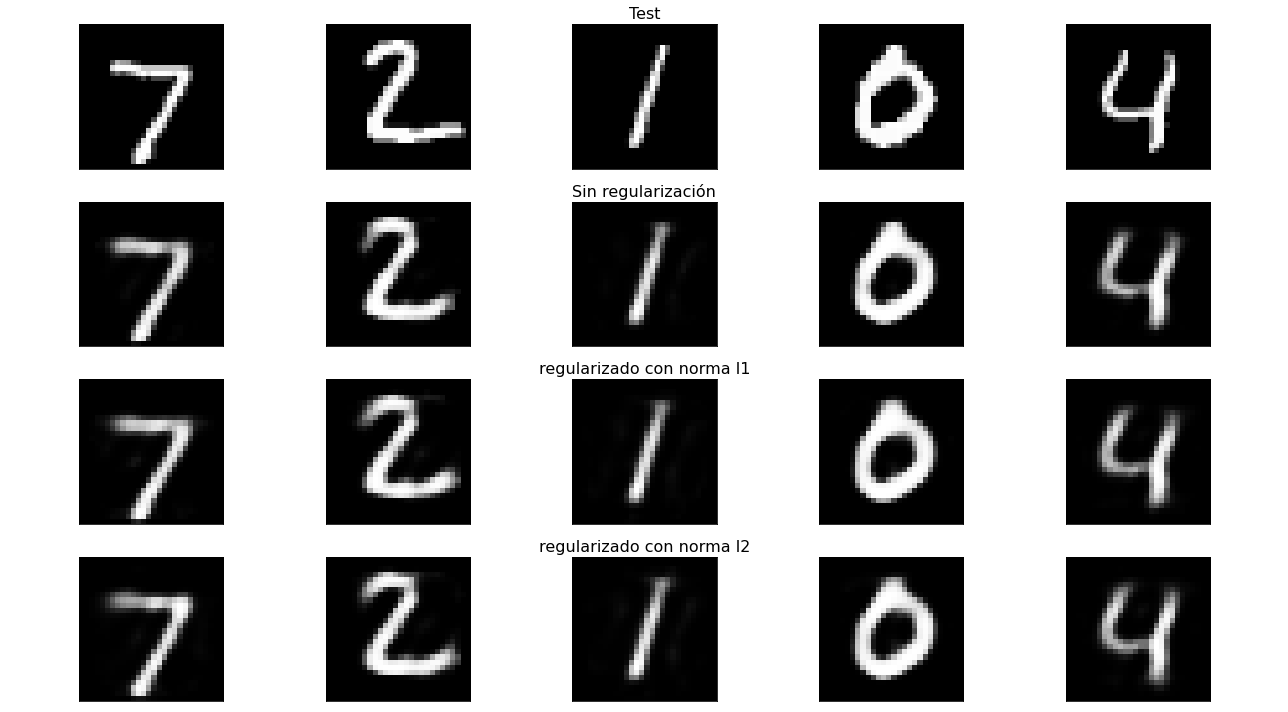

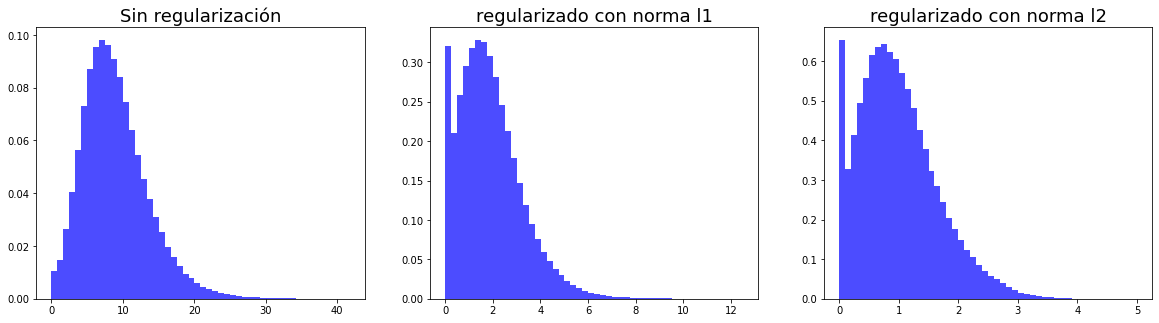

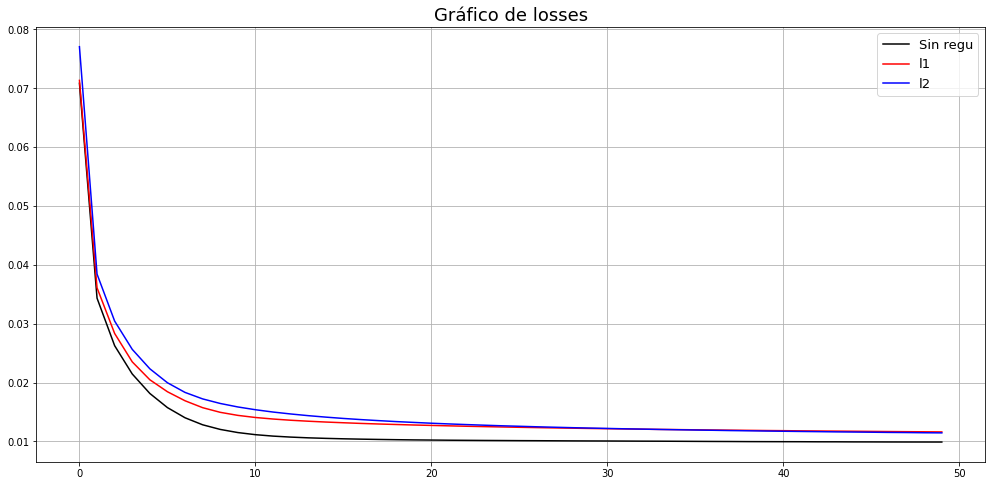

In [ ]:
plot_images(images_reshape)
histograms(hists)
losses(historials)

Podemos observar en la comparación de las imágenes que las tres imágenes reconstruidas son muy similares entre si, y similares también a la imagen original. Además, vemos por los histogramas que la cantidad de nodos inactivos para los autoencoders regularizados con norma l1 y norma l2 es mayor a el autoencoder sin regularizar, por lo que las neuronas activas de los autoencoder regularizados al ser menos, aprenden de forma más inteligente para reconstruir la imagen, por lo que la calidad de estos es mejor que el autoencoder sin regularizar. Para complementar la semejanza entre las imagenes, vemos la comparación mediante las funciones previamente presentadas (MSE y SSIM):

In [ ]:
arr_1 = {
      'menor MSE sin regu': [min(historials[0].history["loss"])],
      'menor MSE norma l1': [min(historials[1].history["loss"])],
      'menor MSE norma l2': [min(historials[2].history["loss"])]
  }

arr_2 = {
      'Nodos inactivos sin regu': ['{:.2e}'.format(np.count_nonzero(hists[0]<=1e-4))],
      'Nodos inactivos norma l1': ['{:.2e}'.format(np.count_nonzero(hists[1]<=1e-4))],
      'Nodos inactivos norma l2': ['{:.2e}'.format(np.count_nonzero(hists[2]<=1e-4))]
  }

arr_3 = {
      'Nodos activos sin regu': ['{:.2e}'.format(np.count_nonzero(hists[0]>1e-4))],
      'Nodos activos norma l1': ['{:.2e}'.format(np.count_nonzero(hists[1]>1e-4))],
      'Nodos activos norma l2': ['{:.2e}'.format(np.count_nonzero(hists[2]>1e-4))]
  }
t_1 = QTable(arr_1) 
t_2 = QTable(arr_2) 
t_3 = QTable(arr_3) 
t_1['menor MSE sin regu'].info.format = '7.6f'
t_1['menor MSE norma l1'].info.format = '7.6f'
t_1['menor MSE norma l2'].info.format = '7.6f'

print('###########################################################################')
print('#######################       Menor MSE        ############################')
print('###########################################################################')
print('###########################################################################')
print(t_1)
print('###########################################################################')
print('########################     Nodos activos     ############################')
print('###########################################################################')
print(t_2)
print('###########################################################################')
print('########################    Nodos inactivos    ############################')
print('###########################################################################')
print(t_3)

MSE_sin = []
MSE_l1 = []
MSE_l2 = []
SSIM_sin = []
SSIM_l1 = []
SSIM_l2 = []
for i in range(len(images_reshape[0])):
  MSE_sin.append(mse_1(images_reshape[0][i,:,:], images_reshape[1][i,:,:]))
  MSE_l1.append(mse_1(images_reshape[0][i,:,:], images_reshape[2][i,:,:]))
  MSE_l2.append(mse_1(images_reshape[0][i,:,:], images_reshape[3][i,:,:]))
  SSIM_sin.append(ssim(images_reshape[0][i,:,:], images_reshape[1][i,:,:]))
  SSIM_l1.append(ssim(images_reshape[0][i,:,:], images_reshape[2][i,:,:]))
  SSIM_l2.append(ssim(images_reshape[0][i,:,:], images_reshape[3][i,:,:]))

arr = {
    'MSE sin regu': MSE_sin,
    'MSE norma l1': MSE_l1,
    'MSE norma l2': MSE_l2,
    'SSIM sin relu': SSIM_sin,
    'SSIM norma l1': SSIM_l1,
    'SSIM norma l2': SSIM_l2
}
t = QTable(arr) 
t['MSE sin regu'].info.format = '7.6f'
t['MSE norma l1'].info.format = '7.6f'
t['MSE norma l2'].info.format = '7.6f'
t['SSIM sin relu'].info.format = '7.6f'
t['SSIM norma l1'].info.format = '7.6f'
t['SSIM norma l2'].info.format = '7.6f'

arr2 = {
    'MSE sin regu': [sum(MSE_sin)/len(MSE_sin)],
    'MSE norma l1': [sum(MSE_l1)/len(MSE_l1)],
    'MSE norma l2': [sum(MSE_l2)/len(MSE_l2)],
    'SSIM sin relu': [sum(SSIM_sin)/len(SSIM_sin)],
    'SSIM norma l1': [sum(SSIM_l1)/len(SSIM_l1)],
    'SSIM norma l2': [sum(SSIM_l2)/len(SSIM_l2)]
}
t2 = QTable(arr2) 
t2['MSE sin regu'].info.format = '7.6f'
t2['MSE norma l1'].info.format = '7.6f'
t2['MSE norma l2'].info.format = '7.6f'
t2['SSIM sin relu'].info.format = '7.6f'
t2['SSIM norma l1'].info.format = '7.6f'
t2['SSIM norma l2'].info.format = '7.6f'
print('###########################################################################')
print('########################       MSE y SSIM      ############################')
print('###########################################################################')
print(t)
print('###########################################################################')
print('########################  Promedios MSE y SSIM   ##########################')
print('###########################################################################')
print(t2)

###########################################################################
#######################       Menor MSE        ############################
###########################################################################
###########################################################################
menor MSE sin regu menor MSE norma l1 menor MSE norma l2
------------------ ------------------ ------------------
          0.009899           0.011617           0.011456
###########################################################################
########################     Nodos activos     ############################
###########################################################################
Nodos inactivos sin regu Nodos inactivos norma l1 Nodos inactivos norma l2
------------------------ ------------------------ ------------------------
                1.11e+03                 1.35e+04                 1.32e+04
########################################################################

Vemos que el promedio de los errores de MSE son muy similares entre si, al igual que los errores de SSIM, lo que evidencia que las imagenes son muy similares entre si, afirmando la sentencia que se presento en esta tarea. A continuación se presenta el mismo ejercicio con la data real.

## 2) Primer _dataset_ real

El primer dataset real corresponde a diversas construcciones arquitectonicas del mundo [2], dataset que usamos para el desafio de kaggle de la tarea 1. 

In [ ]:
!git clone https://github.com/rffuente/INF-395-477---Tareas.git

fatal: destination path 'INF-395-477---Tareas' already exists and is not an empty directory.


In [ ]:
path = "INF-395-477---Tareas/Taller_1/data/"

In [ ]:
all_images = []

for i in glob.iglob(path+"train_images/*"):
  img = image.load_img(i, target_size=(80,80,3))
  img = image.img_to_array(img)
  img = img/255.
  all_images.append(img)

all_images = np.array(all_images)
test_images = all_images[9000:]
all_images = all_images[:9000]

In [ ]:
# split data into train and validation data
train_x, val_x = train_test_split(all_images, random_state=32, test_size=0.1)

In [ ]:
def real_autoencoder_model(train_x, val_x, size, ep=30, regu=0, lamb = 1e-6):

  input_img = Input(shape=(size,size,3))  
      
  #encoding architecture
  x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
  x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
  x2 = MaxPool2D( (2, 2))(x2)
  if regu==0:
    # Sin regularizar
    encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
  elif regu == 1:
    #Regularizado con norma l1
    encoded = Conv2D(64, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(lamb))(x2)
  elif regu == 2:
    #Regularizado con norma l2
    encoded = Conv2D(64, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l2(lamb))(x2)
  elif regu == 3:
    #Regularizado con norma KL, CAMBIAR A NORMA KL
    encoded = Conv2D(64, (3, 3), activation='relu', padding='same', activity_regularizer=KL_regularizer)(x2)

  # decoding architecture
  x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
  x3 = UpSampling2D((2, 2))(x3)
  x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
  x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
  decoded = Conv2D(3, (3, 3), padding='same')(x1)

  autoencoder = Model(input_img, decoded)

  ###### ENCONDER MODEL ######
  encoder = Model(input_img, encoded)

  autoencoder.compile(optimizer='adam', loss='mse')

  early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

  history = autoencoder.fit(train_x, train_x,
            epochs=ep,
            batch_size=256,
            shuffle=True,
            validation_data=(val_x, val_x),
            callbacks=[early_stopper])
  
  return encoded, decoded, autoencoder, encoder, history

## Entrenamiento

In [ ]:
lamb = 1e-8
encoded1, decoded1, autoencoder1, encoder1, history1 = real_autoencoder_model(train_x, val_x, 80, ep=20, regu=0)
encoded2, decoded2, autoencoder2, encoder2, history2 = real_autoencoder_model(train_x, val_x, 80, ep=20, regu=1, lamb = lamb)
encoded3, decoded3, autoencoder3, encoder3, history3 = real_autoencoder_model(train_x, val_x, 80, ep=20, regu=2, lamb = lamb)

Train on 8100 samples, validate on 900 samples
Epoch 1/20
8100/8100 [==============================] - 53s 7ms/step - loss: 0.0590 - val_loss: 0.0232
Epoch 2/20
8100/8100 [==============================] - 52s 6ms/step - loss: 0.0154 - val_loss: 0.0106
Epoch 3/20
8100/8100 [==============================] - 53s 7ms/step - loss: 0.0085 - val_loss: 0.0082
Epoch 4/20
8100/8100 [==============================] - 53s 7ms/step - loss: 0.0069 - val_loss: 0.0059
Epoch 5/20
8100/8100 [==============================] - 53s 7ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 6/20
8100/8100 [==============================] - 53s 7ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 7/20
8100/8100 [==============================] - 53s 7ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 8/20
8100/8100 [==============================] - 53s 7ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 9/20
8100/8100 [==============================] - 53s 7ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 10/20
8100/8100 [===

In [ ]:
encoded_imgs1 = encoder1.predict(test_images)
predictions1 = autoencoder1.predict(test_images)

encoded_imgs2 = encoder2.predict(test_images)
predictions2 = autoencoder2.predict(test_images)

encoded_imgs3 = encoder3.predict(test_images)
predictions3 = autoencoder3.predict(test_images)

hists_3 = [encoded_imgs1, encoded_imgs2, encoded_imgs3]
images_3 = [test_images, predictions1, predictions2, predictions3]
historials_3 = [history1, history2, history3]

## Resultados

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

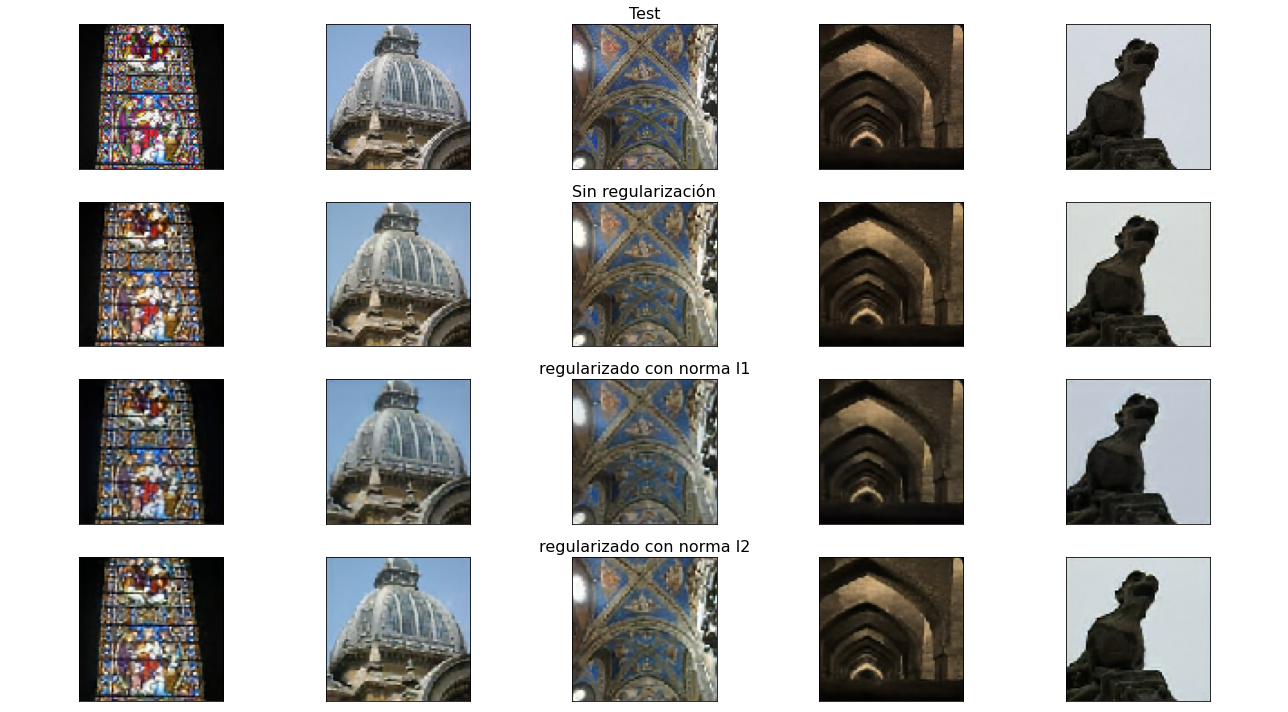

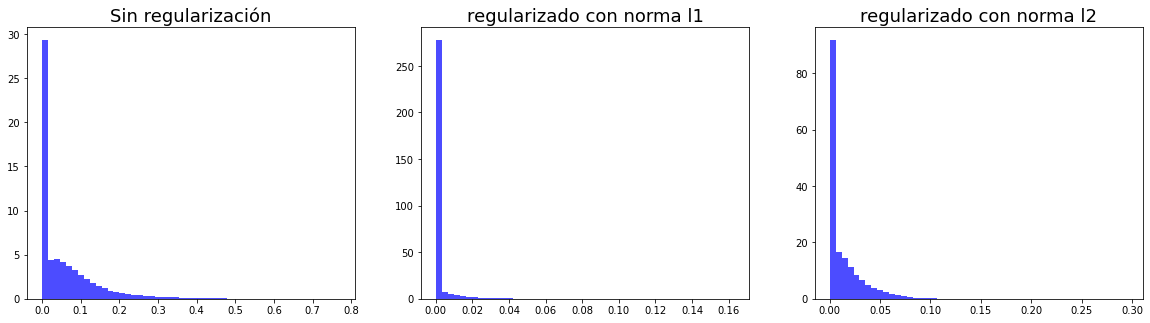

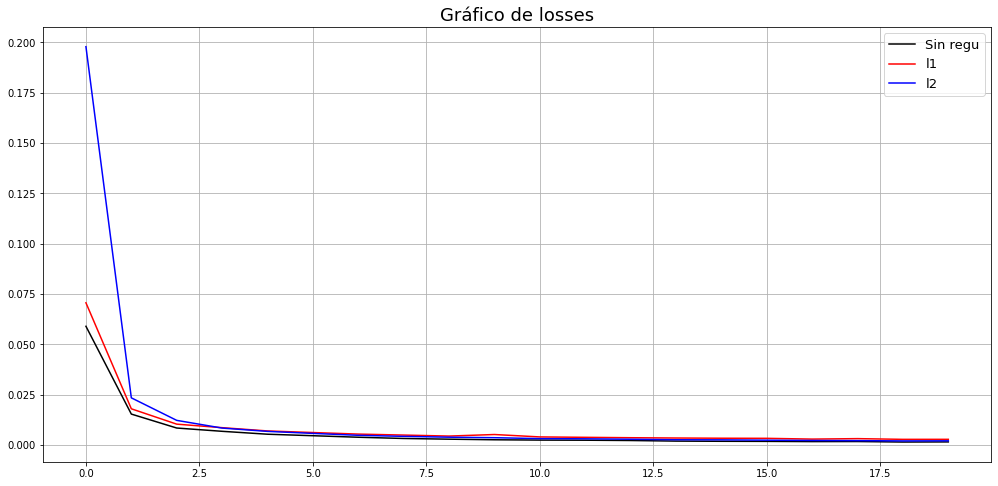

In [ ]:
plot_images(images_3)
histograms(hists_3)
losses(historials_3)

Al igual que la data sintetica, observamos que las imagenes son bastante cercanas entre si. Por otra parte, por los histogramas observamos que la cantidad de nodos inactivos para los autoencoder regularizados con norma l1 y l2 es bastante mayor a la del autoencoder sin regularizar, lo que quiere decir que con muchas menos neuronas podemos obtener la misma reconstrucción, concluyendo que la calidad de estos autoencoders es mejor. Para reafirmar esto, vemos las comparaciones usando las metricas anteriores:

In [ ]:
show_statistics(historials_3, hists_3, images_3)

###########################################################################
#######################       Menor MSE        ############################
###########################################################################
###########################################################################
menor MSE sin regu menor MSE norma l1 menor MSE norma l2
------------------ ------------------ ------------------
          0.001536           0.002869           0.002090
###########################################################################
########################     Nodos activos     ############################
###########################################################################
Nodos inactivos sin regu Nodos inactivos norma l1 Nodos inactivos norma l2
------------------------ ------------------------ ------------------------
                8.71e+06                 1.90e+07                 9.82e+06
########################################################################

Podemos ver que el promedio de los errores usando MSE son bastante cercanos entre si (todos del orden $1e-3$), y que usando SSIM son todas mayor a 0.9, por lo que objetivamente las imagenes reconstruidas son muy similares entre si, reafirmando que los autoencoder regularizados tienen mejor calidad.

## 3) Segundo _dataset_ real

El segundo dataset real corresponde a un conjunto de fotografias de rostros de distintas personas del mundo [3].

In [ ]:
#!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz
#!tar -xvzf lfw.tgz
face_images = glob.glob('lfw/**/*.jpg')

In [ ]:
allfaces_images = []

for i in tqdm(face_images):
  img = image.load_img(i, target_size=(80,80,3))
  img = image.img_to_array(img)
  img = img/255.
  allfaces_images.append(img)

allfaces_images = np.array(allfaces_images)

# split data into train and validation data
train_x2, val_x2 = train_test_split(allfaces_images, random_state=32, test_size=0.1)

100%|██████████| 13233/13233 [00:15<00:00, 855.78it/s]


## Entrenamiento

In [ ]:
lamb = 1e-8
encoded12, decoded12, autoencoder12, encoder12, history12 = real_autoencoder_model(train_x2, val_x2, 80, ep=20, regu=0)
encoded22, decoded22, autoencoder22, encoder22, history22 = real_autoencoder_model(train_x2, val_x2, 80, ep=20, regu=1, lamb = lamb)
encoded32, decoded32, autoencoder32, encoder32, history32 = real_autoencoder_model(train_x2, val_x2, 80, ep=20, regu=2, lamb = lamb)

Train on 11909 samples, validate on 1324 samples
Epoch 1/20
11909/11909 [==============================] - 86s 7ms/step - loss: 0.1142 - val_loss: 0.0160
Epoch 2/20
11909/11909 [==============================] - 76s 6ms/step - loss: 0.0100 - val_loss: 0.0050
Epoch 3/20
11909/11909 [==============================] - 77s 6ms/step - loss: 0.0040 - val_loss: 0.0032
Epoch 4/20
11909/11909 [==============================] - 77s 6ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 5/20
11909/11909 [==============================] - 78s 7ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 6/20
11909/11909 [==============================] - 78s 7ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 7/20
11909/11909 [==============================] - 78s 7ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/20
11909/11909 [==============================] - 78s 7ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/20
11909/11909 [==============================] - 78s 7ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 

In [ ]:
encoded_imgs1 = encoder12.predict(val_x2)
predictions1 = autoencoder12.predict(val_x2)

encoded_imgs2 = encoder22.predict(val_x2)
predictions2 = autoencoder22.predict(val_x2)

encoded_imgs3 = encoder32.predict(val_x2)
predictions3 = autoencoder32.predict(val_x2)

hists_5 = [encoded_imgs1, encoded_imgs2, encoded_imgs3]
images_5 = [val_x2, predictions1, predictions2, predictions3]
historials_5 = [history12, history22, history32]

## Resultados

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

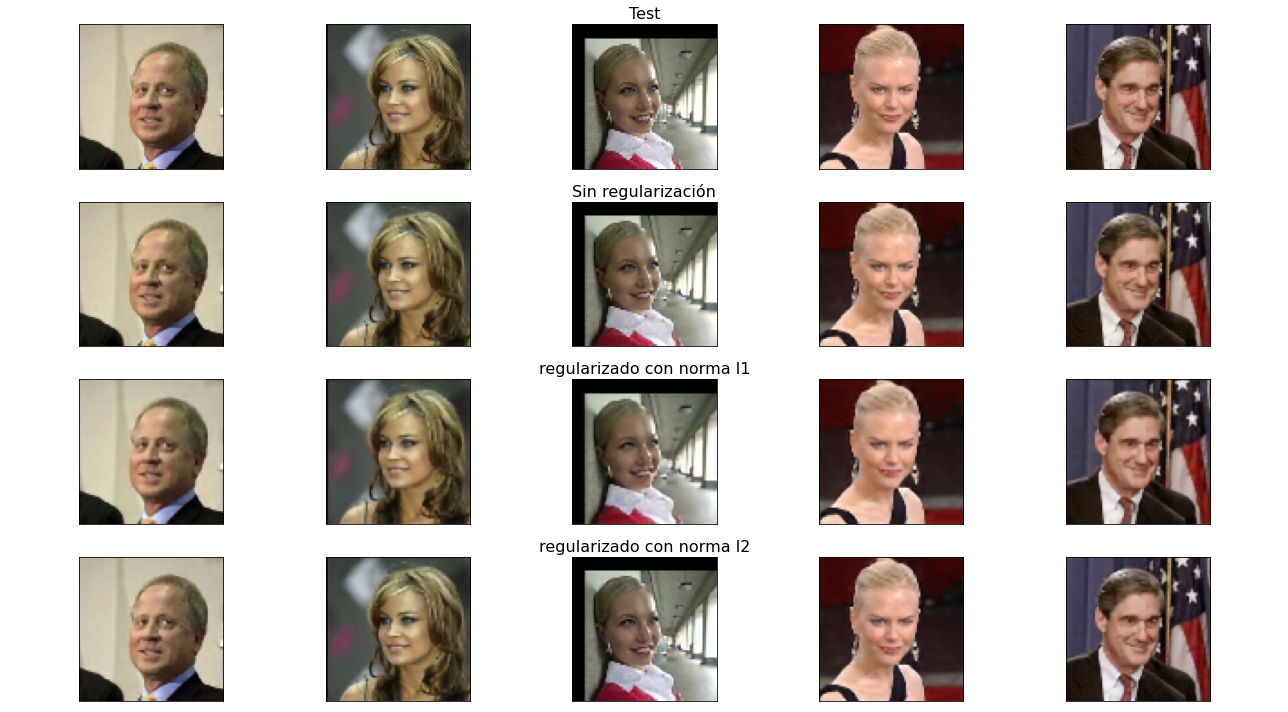

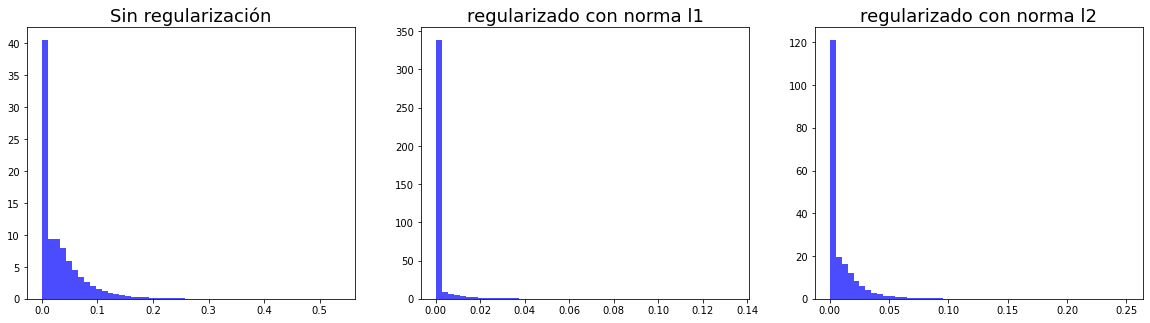

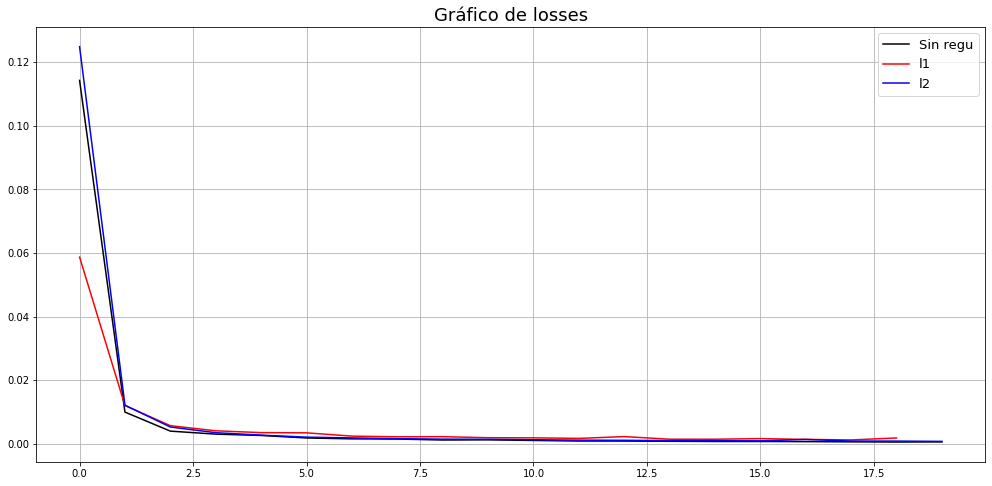

In [ ]:
plot_images(images_5)
histograms(hists_5)
losses(historials_5)

In [ ]:
show_statistics(historials_5, hists_5, images_5)

###########################################################################
#######################       Menor MSE        ############################
###########################################################################
###########################################################################
menor MSE sin regu menor MSE norma l1 menor MSE norma l2
------------------ ------------------ ------------------
          0.000567           0.001229           0.000771
###########################################################################
########################     Nodos activos     ############################
###########################################################################
Nodos inactivos sin regu Nodos inactivos norma l1 Nodos inactivos norma l2
------------------------ ------------------------ ------------------------
                4.85e+07                 1.18e+08                 6.95e+07
########################################################################

Usando la misma red que la data anterior, nuevamente corroboramos la afirmación de esta tarea.

## 1.2) Segundo _dataset_ sintetico

El segundo data set sintetico presentado es un conjunto de figuras geometricas creadas de forma altearoria. Los tipos de figuras son:
  * Cuadrados
  * Triangulos
  * Rectangulos
  * Circulos
  * Poligonos irregulares de 4 a 5 lados.

Además, las variaciones entre imaganes fueron:
* posición
* color
* tamaño de los lados

La idea de este dataset es que a diferencia de imagenes comunes tomadas con fotografia que tienen ruido por defecto, las matrices de este dataset contienen números solo donde se encuentra la foto, teniendo el resto de valores seteados en 0. La idea es verificar si la red funciona con este punto extra.

In [ ]:
!git clone https://github.com/rffuente/INF-395-477---Tareas.git

fatal: destination path 'INF-395-477---Tareas' already exists and is not an empty directory.


In [ ]:
path = "INF-395-477---Tareas/Taller_2/propuesta/"

In [ ]:
all_images = []

for i in glob.iglob(path+"train/*"):
  img = image.load_img(i, target_size=(80,80,3))
  img = image.img_to_array(img)
  img = img/255.
  all_images.append(img)

all_images = np.array(all_images)

# split data into train and validation data
train_x, val_x = train_test_split(all_images, random_state=32, test_size=0.1)

In [ ]:
test_image = []

for i in glob.iglob(path+"test/*"):
  img = image.load_img(i, target_size=(80,80,3))
  img = image.img_to_array(img)
  img = img/255.
  test_image.append(img)

test_image = np.array(test_image)

## Entrenamiento

In [ ]:
lamb = 1e-8
encoded1, decoded1, autoencoder1, encoder1, history1 = real_autoencoder_model(train_x, val_x, 80, ep=20, regu=0)
encoded2, decoded2, autoencoder2, encoder2, history2 = real_autoencoder_model(train_x, val_x, 80, ep=20, regu=1, lamb = lamb)
encoded3, decoded3, autoencoder3, encoder3, history3 = real_autoencoder_model(train_x, val_x, 80, ep=20, regu=2, lamb = lamb)

Train on 2700 samples, validate on 300 samples
Epoch 1/20
2700/2700 [==============================] - 17s 6ms/step - loss: 0.8429 - val_loss: 0.1279
Epoch 2/20
2700/2700 [==============================] - 17s 6ms/step - loss: 0.0970 - val_loss: 0.0321
Epoch 3/20
2700/2700 [==============================] - 17s 6ms/step - loss: 0.0339 - val_loss: 0.0243
Epoch 4/20
2700/2700 [==============================] - 17s 6ms/step - loss: 0.0181 - val_loss: 0.0137
Epoch 5/20
2700/2700 [==============================] - 17s 6ms/step - loss: 0.0108 - val_loss: 0.0080
Epoch 6/20
2700/2700 [==============================] - 17s 6ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 7/20
2700/2700 [==============================] - 17s 6ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 8/20
2700/2700 [==============================] - 17s 6ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 9/20
2700/2700 [==============================] - 17s 6ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 10/20
2700/2700 [===

In [ ]:
encoded_imgs1 = encoder1.predict(test_image)
predictions1 = autoencoder1.predict(test_image)

encoded_imgs2 = encoder2.predict(test_image)
predictions2 = autoencoder2.predict(test_image)

encoded_imgs3 = encoder3.predict(test_image)
predictions3 = autoencoder3.predict(test_image)

hists_4 = [encoded_imgs1, encoded_imgs2, encoded_imgs3]
images_4 = [test_image, predictions1, predictions2, predictions3]
historials_4 = [history1, history2, history3]

## Resultados

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

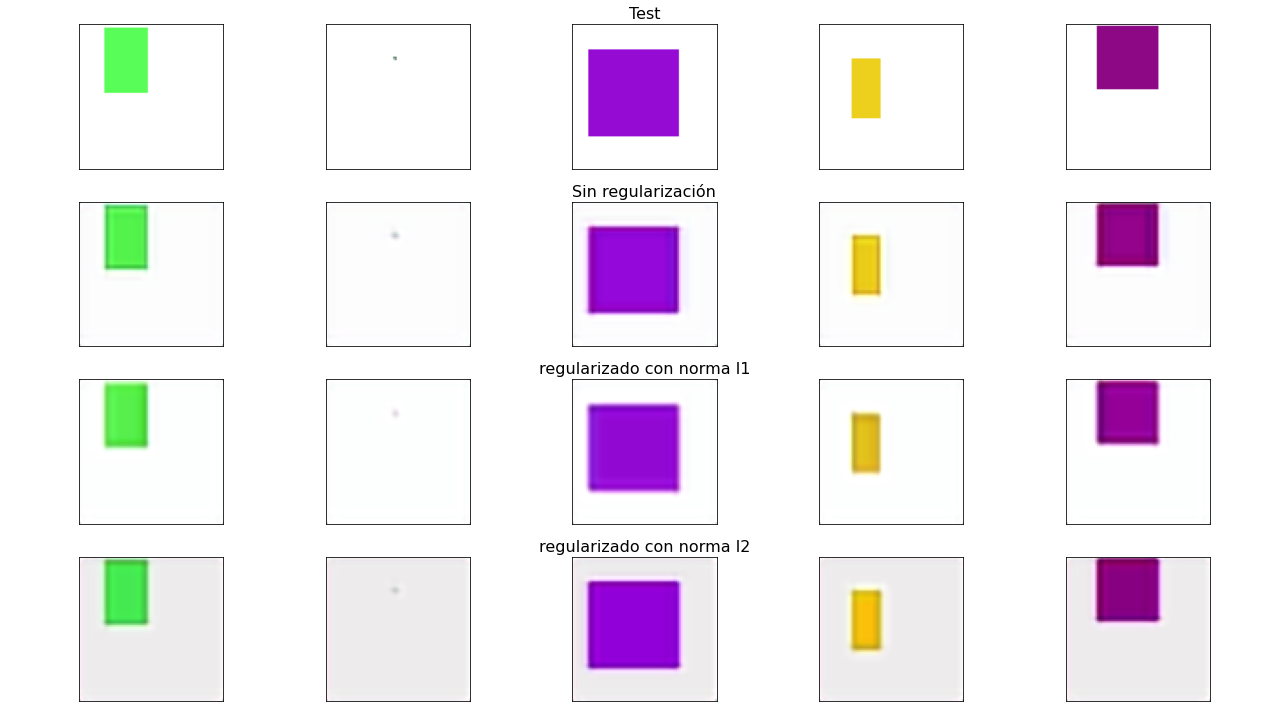

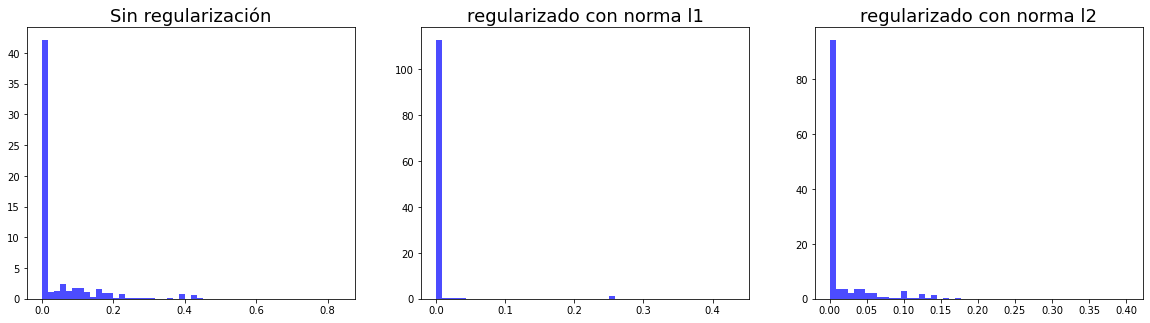

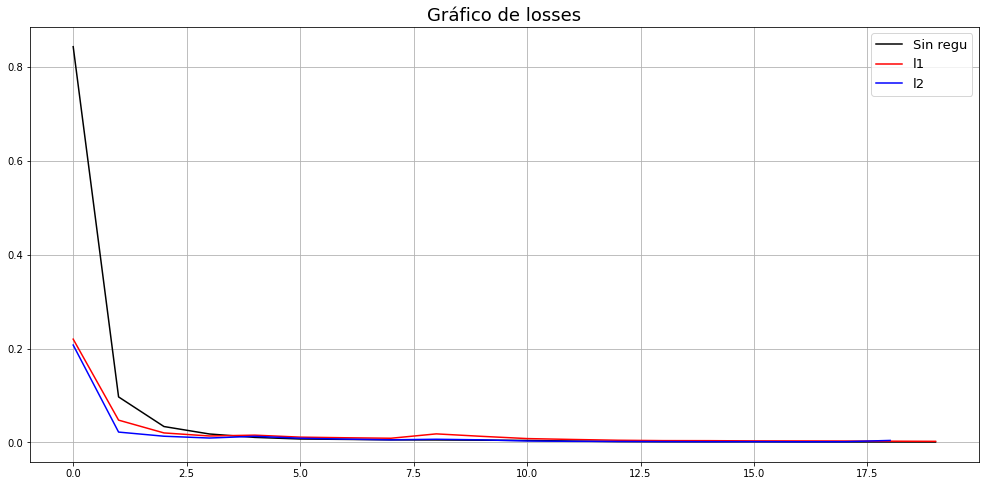

In [ ]:
plot_images(images_4)
histograms(hists_4)
losses(historials_4)

In [ ]:
show_statistics(historials_4, hists_4, images_4)

###########################################################################
#######################       Menor MSE        ############################
###########################################################################
###########################################################################
menor MSE sin regu menor MSE norma l1 menor MSE norma l2
------------------ ------------------ ------------------
          0.000905           0.002403           0.001477
###########################################################################
########################     Nodos activos     ############################
###########################################################################
Nodos inactivos sin regu Nodos inactivos norma l1 Nodos inactivos norma l2
------------------------ ------------------------ ------------------------
                6.66e+06                 9.90e+06                 7.57e+06
########################################################################

Vemos que la red puede reconstruir este tipo de imagenes bastante bien, y funciona al igual que los otros dataset presentados anteriormente, concluyendo que la afirmación de que los autoencoders regularizados tienen mejor calidad que un autoencoder sin regularizar es cierta.